In [70]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from decimal import Decimal
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
%matplotlib inline

In [71]:
def load_data(filename):
    ''' load data and plot the data and get the complexity of the data
    dictionary maps y to its feature vector x'''
    f = open(filename,'r')
    rows = 0
    colums = 0
    xy = defaultdict(list)
    for word in f:
        if word == " ":
            break
        if not word.startswith("#"):
            nums = word.split()
            nums = [float(n) for n in nums]
            xy[float(nums[-1])] = nums[0:len(nums)-1]
    return xy
                
                

In [72]:
sset1 = load_data("svar-set1.dat.txt")

In [73]:
sset2 = load_data("svar-set2.dat.txt")

In [74]:
sset3 = load_data("svar-set3.dat.txt")

In [75]:
sset4 = load_data("svar-set4.dat.txt")

In [76]:
def plot_data(data,y_predict,poly):
    '''This function takes a dictionary of the data loaded from the files'''
    x = list()
    y = list()
    # making a list of all feature values
    for d1 in data.values():
        for d2 in d1:
            x.append(d2)
    # making a list of all label values
    for d1 in data.keys():
        y.append(d1)
    plt.show()
    if (y_predict is not None and poly==0):
        plt.plot(x,y,'ro')
        plt.plot(x,y_predict)
    elif(y_predict is not None and poly>0):
        plt.plot(x,y,'ro')
        coefficients = polyfit(x, y_predict, poly)
        polynomial = poly1d(coefficients)
        plt.plot(x,y_predict,'o')
    else:
        plt.plot(x,y,'ro')
    plt.show()

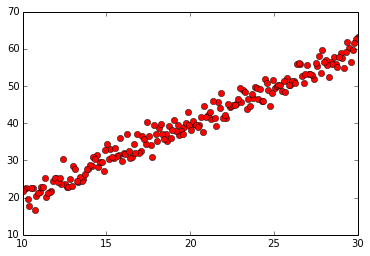

In [77]:
plot_data(sset1,None,0)

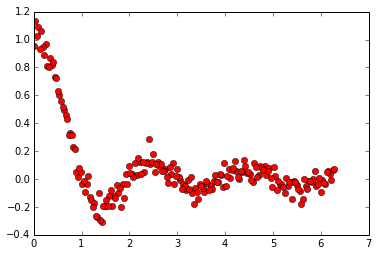

In [78]:
plot_data(sset2,None,0)

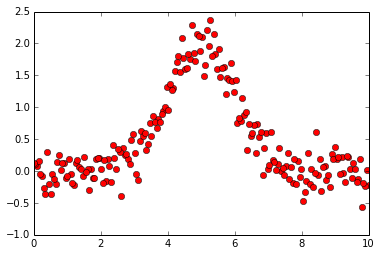

In [79]:
plot_data(sset3,None,0)

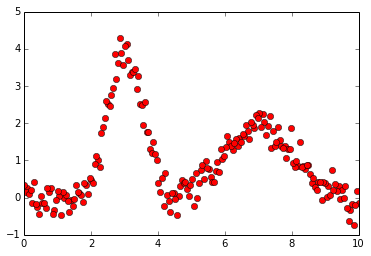

In [80]:
plot_data(sset4,None,0)

In [81]:
def fit_single_feature_linear_model(x,y):
    '''fit linear model with the data
       compute training and testing error
       plot regression model on testing data'''
#     x = list()
#     y = data.keys()
#     m = len(y)
#     for d1 in data.values():
#         for d2 in d1:
#             x.append(d2)
    m = len(y)
    sum_of_xi = sum(x) 
    sum_of_xi2 = sum([d**2 for d in x])
    sum_of_yi = sum(y)
    sum_of_xiyi =  sum([x[i]*y[i] for i in range(len(x))])
#     print 'm:', m
#     print 'sum(x) : ' , sum_of_xi 
#     print 'sum(x2): ' , sum_of_xi2
#     print 'sum(y) : ', sum_of_yi 
#     print 'sum(y2): ', sum_of_xiyi
    A = np.matrix([[m, sum_of_xi], [sum_of_xi, sum_of_xi2]])
    B = np.matrix([[sum_of_yi],[sum_of_xiyi]])
    theta = solve(A,B)
    return theta

In [100]:
def create_xy(data):
    x = list()
    y = data.keys()
    m = len(y)
    for d1 in data.values():
        for d2 in d1:
            x.append(d2)
            
    return x,y

In [102]:
def predict_y(x,theta):
    X = np.array(x)
    Y_predict = theta[0] + X*theta[1]
    return Y_predict

In [103]:
def calculate_error(predict_Y,Y):
    m = len(predict_Y)
    avg = np.mean(Y)
    error = 0.
    for idx in range(m):
        numerator = (predict_Y[idx]- Y[idx])**2
        denominator = (Y[idx]- avg)**2
        error = error + (numerator/denominator)
    return error/m

In [104]:
def do_experiment(data,folds,regr):
    # fit model and obtain theta value
    x = data.values()
    y = data.keys()
#     theta = fit_single_feature_linear_model(data)
#     Y_predict = predict_y(x,np.array(theta))
    avg_train_err = 0
    avg_test_err = 0
    avg_regr_test_err = 0
    avg_regr_train_err = 0
    regr = linear_model.LinearRegression()
    fold = 1
    
    for train_ind, test_ind in KFold(len(y), folds,shuffle=True,random_state=5):
        X_train = np.array(x)[train_ind]
        Y_train = np.array(y)[train_ind]
        X_test = np.array(x)[test_ind]
        Y_test = np.array(y)[test_ind]
        
        theta = fit_single_feature_linear_model(X_train,Y_train)
        
        Y_predict_train = predict_y(X_train,np.array(theta))
        train_error = calculate_error(Y_predict_train,Y_train)
        avg_train_err += train_error
        
        
        Y_predict_test = predict_y(X_test,np.array(theta))
        test_error = calculate_error(Y_predict_test,Y_test)
        avg_test_err += test_error
        
        print 'fold: ', fold, 'train_err: ', train_error, 'test_err: ', test_error
    
        #comparing model with the python function
        regr.fit(X_train,Y_train)
        
        Y_predict_regr_train = regr.predict(X_train)
        regr_train_error = mean_squared_error(Y_train,Y_predict_regr_train)
        avg_regr_train_err += regr_train_error
        
        Y_predict_regr_test = regr.predict(X_test)
        regr_test_error = mean_squared_error(Y_test,Y_predict_regr_test)
        avg_regr_test_err += regr_test_error
        
#         print 'avg_regr_train_err: ',  avg_regr_train_err, 'avg_regr_test_err: ', avg_regr_test_err
        if regr:
            print 'Regression coefficient: ', regr.coef_
            print 'model coefficient:', theta[1][0]
            print 'Regression intercept:', regr.intercept_
            print 'model intercept: ', theta[0][0]
            print ' '
        fold += 1
        
    avg_train_err /= folds
    avg_test_err /= folds
    avg_regr_train_err /= folds
    avg_regr_test_err /= folds
    
    print 'folds: ', folds
    print 'avg_train_err: ' , avg_train_err, 'avg_test_err: ', avg_test_err
    print 'avg_regr_train_err: ',  avg_regr_train_err, 'avg_regr_test_err: ', avg_regr_test_err
 
    theta = fit_single_feature_linear_model(np.array(x),np.array(y))
    Y_predict = predict_y(np.array(x),np.array(theta))
    plot_data(data,Y_predict,0)
    
    

fold:  1 train_err:  [ 2.5643389] test_err:  [ 6.69639527]
Regression coefficient:  [ 1.99733835]
model coefficient: [[ 1.99733835]]
Regression intercept: 0.0590463588558
model intercept:  [[ 0.05904636]]
 
fold:  2 train_err:  [ 43.07483632] test_err:  [ 0.18679461]
Regression coefficient:  [ 1.97933987]
model coefficient: [[ 1.97933987]]
Regression intercept: 0.411471426747
model intercept:  [[ 0.41147143]]
 
fold:  3 train_err:  [ 4.92286622] test_err:  [ 9.02608797]
Regression coefficient:  [ 1.97453175]
model coefficient: [[ 1.97453175]]
Regression intercept: 0.455615057975
model intercept:  [[ 0.45561506]]
 
fold:  4 train_err:  [ 930.2866067] test_err:  [ 26.72276802]
Regression coefficient:  [ 1.99118562]
model coefficient: [[ 1.99118562]]
Regression intercept: 0.107631148207
model intercept:  [[ 0.10763115]]
 
fold:  5 train_err:  [ 0.89304746] test_err:  [ 0.37356288]
Regression coefficient:  [ 1.99350302]
model coefficient: [[ 1.99350302]]
Regression intercept: 0.08138302625

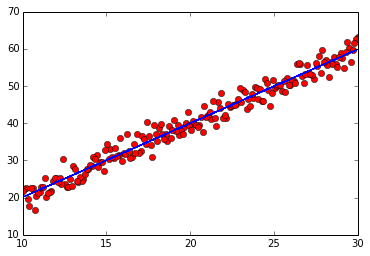

In [105]:
do_experiment(sset1,10,regr=True)

fold:  1 train_err:  [ 6985.24508948] test_err:  [ 0.7575781]
Regression coefficient:  [-0.07335992]
model coefficient: [[-0.07335992]]
Regression intercept: 0.31557967806
model intercept:  [[ 0.31557968]]
 
fold:  2 train_err:  [ 457.08514332] test_err:  [ 2.37101957]
Regression coefficient:  [-0.07492853]
model coefficient: [[-0.07492853]]
Regression intercept: 0.32097429943
model intercept:  [[ 0.3209743]]
 
fold:  3 train_err:  [ 618.80820205] test_err:  [ 115.06734735]
Regression coefficient:  [-0.08072797]
model coefficient: [[-0.08072797]]
Regression intercept: 0.345946785565
model intercept:  [[ 0.34594679]]
 
fold:  4 train_err:  [ 1912.03666355] test_err:  [ 8.65904085]
Regression coefficient:  [-0.08055435]
model coefficient: [[-0.08055435]]
Regression intercept: 0.339454096536
model intercept:  [[ 0.3394541]]
 
fold:  5 train_err:  [ 33.95223373] test_err:  [ 22.8884613]
Regression coefficient:  [-0.08160705]
model coefficient: [[-0.08160705]]
Regression intercept: 0.351692

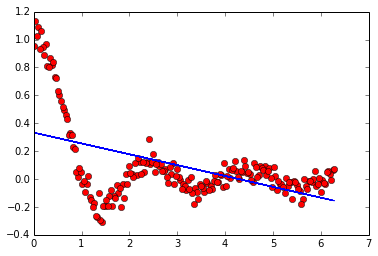

In [106]:
do_experiment(sset2,10,regr=True)

fold:  1 train_err:  [ 1.06557293] test_err:  [ 13.42021327]
Regression coefficient:  [-0.01125662]
model coefficient: [[-0.01125662]]
Regression intercept: 0.569885601012
model intercept:  [[ 0.5698856]]
 
fold:  2 train_err:  [ 1.0072888] test_err:  [ 0.94243139]
Regression coefficient:  [ 0.00242624]
model coefficient: [[ 0.00242624]]
Regression intercept: 0.474622493992
model intercept:  [[ 0.47462249]]
 
fold:  3 train_err:  [ 0.9991147] test_err:  [ 1.04523115]
Regression coefficient:  [-0.0025476]
model coefficient: [[-0.0025476]]
Regression intercept: 0.500714787263
model intercept:  [[ 0.50071479]]
 
fold:  4 train_err:  [ 1.01825664] test_err:  [ 19.93851504]
Regression coefficient:  [-0.0035125]
model coefficient: [[-0.0035125]]
Regression intercept: 0.495124989359
model intercept:  [[ 0.49512499]]
 
fold:  5 train_err:  [ 1.0000287] test_err:  [ 1.017117]
Regression coefficient:  [-0.00164679]
model coefficient: [[-0.00164679]]
Regression intercept: 0.498571131238
model int

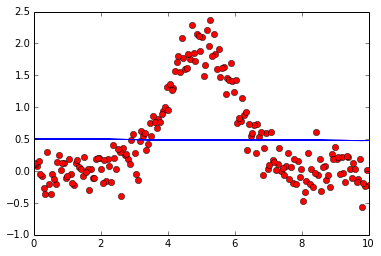

In [107]:
do_experiment(sset3,10,regr=True)

fold:  1 train_err:  [ 1.25607858] test_err:  [ 1.03219207]
Regression coefficient:  [-0.0113101]
model coefficient: [[-0.0113101]]
Regression intercept: 1.03497432777
model intercept:  [[ 1.03497433]]
 
fold:  2 train_err:  [ 1.34087304] test_err:  [ 1.08524703]
Regression coefficient:  [ 0.00746833]
model coefficient: [[ 0.00746833]]
Regression intercept: 0.923744288364
model intercept:  [[ 0.92374429]]
 
fold:  3 train_err:  [ 1.07909738] test_err:  [ 1.19120509]
Regression coefficient:  [-0.0135041]
model coefficient: [[-0.0135041]]
Regression intercept: 1.02173851097
model intercept:  [[ 1.02173851]]
 
fold:  4 train_err:  [ 1.0103724] test_err:  [ 3.83280465]
Regression coefficient:  [-0.0020244]
model coefficient: [[-0.0020244]]
Regression intercept: 1.02067365831
model intercept:  [[ 1.02067366]]
 
fold:  5 train_err:  [ 1.09197757] test_err:  [ 2.21516295]
Regression coefficient:  [-0.00561603]
model coefficient: [[-0.00561603]]
Regression intercept: 1.01600163808
model interc

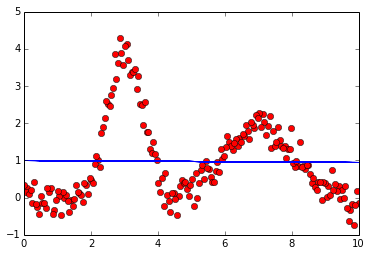

In [108]:
do_experiment(sset4,10,regr=True)

In [56]:
def theta_multinomial(x,y,n):
    z = list()
    for d in x:
        temp = [d**i for i in range(n+1)]
        z.append(temp)
        
    Z = np.array(z)
    ZT = np.transpose(Z.copy())
    ZTZ = dot(ZT,Z)
    ZTZinv = inv(ZTZ)
    Y = np.array(y)
    theta = dot(dot(ZTZinv,ZT),Y)
    thetaT = np.transpose(theta.copy())
    return thetaT,ZT

In [65]:
def solve_single_feature_multinomial(data,n,folds):
    X = data.values()
    y = data.keys()
    Z = np.matrix([])
    x = list()
    z = list()
    avg_train_err = 0
    avg_test_err = 0
    for d1 in data.values():
        for d2 in d1:
            x.append(d2)
#     for d in x:
#         temp = [d**i for i in range(n+1)]
#         z.append(temp)
        
#         Z = np.array(z)
#         ZT = np.transpose(Z.copy())
#         ZTZ = dot(ZT,Z)
#         ZTZinv = inv(ZTZ)
#         Y = np.array(Y_train)
#         theta = dot(dot(ZTZinv,ZT),Y)
#         thetaT = np.transpose(theta.copy())
   
    
    for train_ind, test_ind in KFold(len(y), folds,shuffle=True,random_state=5):
        X_train = np.array(x)[train_ind]
        Y_train = np.array(y)[train_ind]
        X_test = np.array(x)[test_ind]
        Y_test = np.array(y)[test_ind]
        
        
        theta_train,ZT = theta_multinomial(X_train,Y_train,n)
    #********************************
#         Y_predict = dot(thetaT,ZT)
    
        Y_predict_train = dot(theta_train,ZT)
        train_error = calculate_error(Y_predict_train,Y_train)
        avg_train_err += train_error

        theta_test,ZTTest = theta_multinomial(X_test,Y_test,n)
        Y_predict_test = dot(theta_train,ZTTest)
        test_error = calculate_error(Y_predict_test,Y_test)
        avg_test_err += test_error

        print 'fold: ', folds, 'train_err: ', train_error, 'test_err: ', test_error

    avg_train_err /= folds
    avg_test_err /= folds
    print 'fold: ', folds, 'avg_train_err: ', avg_train_err, 'avg_test_err: ', avg_test_err
    
    theta,ZT = theta_multinomial(x,y,n)
    Y_predict =  dot(theta,ZT)
    plot_data(data,Y_predict,n)   

fold:  10 train_err:  5120.42671505 test_err:  28.8267566647
fold:  10 train_err:  303.426885274 test_err:  23.9591499595
fold:  10 train_err:  435.03332845 test_err:  21.7114833237
fold:  10 train_err:  1483.9299474 test_err:  3.39578634761
fold:  10 train_err:  57.8493089297 test_err:  2.22151187819
fold:  10 train_err:  4208.96282043 test_err:  49.0110560313
fold:  10 train_err:  37.0665444779 test_err:  133.504514491
fold:  10 train_err:  16.2930466549 test_err:  5.26724424119
fold:  10 train_err:  88.9396743306 test_err:  14.183864264
fold:  10 train_err:  231.015981977 test_err:  0.879391217859
fold:  10 avg_train_err:  1198.2944253 avg_test_err:  28.2960758419


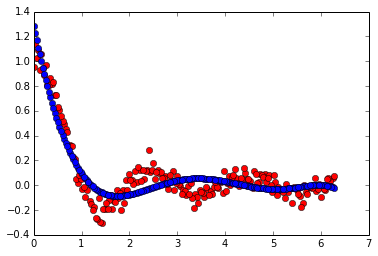

In [67]:
solve_single_feature_multinomial(sset2,6,10)

fold:  10 train_err:  2.36911909936 test_err:  1.76335638327
fold:  10 train_err:  4.70724081927 test_err:  0.283748454593
fold:  10 train_err:  8.26212847293 test_err:  4.14115427173
fold:  10 train_err:  2.86604682084 test_err:  54.5523064828
fold:  10 train_err:  23.9777690992 test_err:  0.117605108816
fold:  10 train_err:  3.47927006264 test_err:  1.26056697682
fold:  10 train_err:  2.38763819598 test_err:  3.94264595621
fold:  10 train_err:  4.47618199448 test_err:  0.861626494125
fold:  10 train_err:  3.57472718583 test_err:  1.94545191095
fold:  10 train_err:  3.90685757087 test_err:  2.39923111089
fold:  10 avg_train_err:  6.00069793214 avg_test_err:  7.12676931502


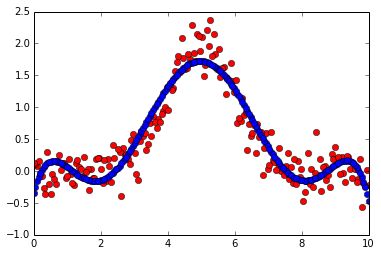

In [68]:
solve_single_feature_multinomial(sset3,6,10)

fold:  10 train_err:  50.4230381242 test_err:  0.463996069282
fold:  10 train_err:  723.927491929 test_err:  0.945753642318
fold:  10 train_err:  26.5887167757 test_err:  0.754188967147
fold:  10 train_err:  1551.67398679 test_err:  5.87905869127
fold:  10 train_err:  278.117365053 test_err:  14.8524002843
fold:  10 train_err:  684.995288238 test_err:  2.57403520158
fold:  10 train_err:  15.7936757423 test_err:  119.668113101
fold:  10 train_err:  31.3646434287 test_err:  22.3757845256
fold:  10 train_err:  180.801514202 test_err:  9.06879328176
fold:  10 train_err:  1232.22618291 test_err:  4.42735041908
fold:  10 avg_train_err:  477.591190319 avg_test_err:  18.1009474183


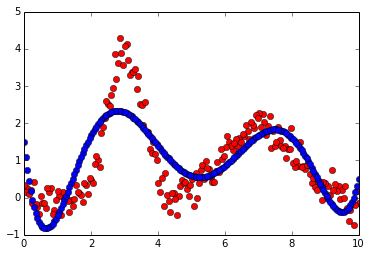

In [69]:
solve_single_feature_multinomial(sset4,7,10)

In [93]:
do_experiment(sset1,2)

fold:  1 train_err:  [ 1.29646066] test_err:  [ 2.56639442]
Regression coefficient:  [ 1.99952639]
model coefficient: [[ 1.99952639]]
Regression intercept: -0.159285709716
model intercept:  [[-0.15928571]]
 
fold:  2 train_err:  [ 3.06663798] test_err:  [ 1.46973547]
Regression coefficient:  [ 1.98185635]
model coefficient: [[ 1.98185635]]
Regression intercept: 0.481163034572
model intercept:  [[ 0.48116303]]
 
folds:  2
avg_train_err:  [ 2.18154932] avg_test_err:  [ 2.01806495]
avg_regr_train_err:  4.2101244283 avg_regr_test_err:  4.30303323436


In [28]:
do_experiment(sset1,3)

fold:  1 train_err:  [ 5.04062137] test_err:  [ 1.45370044]
fold:  2 train_err:  [ 6.45875574] test_err:  [ 69.71761084]
fold:  3 train_err:  [ 741.4993658] test_err:  [ 2.31254672]
folds:  3
avg_train_err:  [ 250.99958097] avg_test_err:  [ 24.49461933]


In [29]:
do_experiment(sset1,5)

fold:  1 train_err:  [ 15.06128558] test_err:  [ 0.73892592]
fold:  2 train_err:  [ 18.58095997] test_err:  [ 2.09203044]
fold:  3 train_err:  [ 2.63988406] test_err:  [ 31.18649172]
fold:  4 train_err:  [ 5550.61372713] test_err:  [ 35.44472074]
fold:  5 train_err:  [ 27752.51241946] test_err:  [ 3.05351615]
folds:  5
avg_train_err:  [ 6667.88165524] avg_test_err:  [ 14.50313699]


In [30]:
do_experiment(sset1,6)

fold:  1 train_err:  [ 70.28449591] test_err:  [ 4.08811785]
fold:  2 train_err:  [ 3.71492667] test_err:  [ 0.53621642]
fold:  3 train_err:  [ 1.60469375] test_err:  [ 18.44179625]
fold:  4 train_err:  [ 2073.93681224] test_err:  [ 0.10335391]
fold:  5 train_err:  [ 9.10114196] test_err:  [ 1.38438142]
fold:  6 train_err:  [ 10.8223131] test_err:  [ 8.20777401]
folds:  6
avg_train_err:  [ 361.57739727] avg_test_err:  [ 5.46027331]


In [31]:
do_experiment(sset1,7)

fold:  1 train_err:  [ 19.89176833] test_err:  [ 0.46868933]
fold:  2 train_err:  [ 3.93728323] test_err:  [ 4.02827609]
fold:  3 train_err:  [ 3.71658623] test_err:  [ 0.80203103]
fold:  4 train_err:  [ 58.66793033] test_err:  [ 13.50501146]
fold:  5 train_err:  [ 8.19569699] test_err:  [ 0.58304971]
fold:  6 train_err:  [ 4.41638717] test_err:  [ 0.79311864]
fold:  7 train_err:  [ 37.07411179] test_err:  [ 0.68999925]
folds:  7
avg_train_err:  [ 19.41425201] avg_test_err:  [ 2.98145365]


In [32]:
do_experiment(sset1,8)

fold:  1 train_err:  [ 7.47613068] test_err:  [ 2.55218531]
fold:  2 train_err:  [ 8.21297898] test_err:  [ 0.28155832]
fold:  3 train_err:  [ 5.86195579] test_err:  [ 0.16652159]
fold:  4 train_err:  [ 1.63748123] test_err:  [ 51.10455008]
fold:  5 train_err:  [ 53.89000409] test_err:  [ 0.15070673]
fold:  6 train_err:  [ 10.54229607] test_err:  [ 1.93413353]
fold:  7 train_err:  [ 72.23764747] test_err:  [ 0.42449145]
fold:  8 train_err:  [ 19.38980175] test_err:  [ 1.25793345]
folds:  8
avg_train_err:  [ 22.40603701] avg_test_err:  [ 7.23401006]


In [35]:
do_experiment(sset1,9)

fold:  1 train_err:  [ 6.34892594] test_err:  [ 0.80812394]
fold:  2 train_err:  [ 1102.16214853] test_err:  [ 0.20930226]
fold:  3 train_err:  [ 2.9128447] test_err:  [ 0.11236195]
fold:  4 train_err:  [ 57.901056] test_err:  [ 3.02856689]
fold:  5 train_err:  [ 145.04791801] test_err:  [ 1.29334521]
fold:  6 train_err:  [ 6.16881336] test_err:  [ 0.17885665]
fold:  7 train_err:  [ 5.46695405] test_err:  [ 1.05029956]
fold:  8 train_err:  [ 362.20552418] test_err:  [ 0.4876484]
fold:  9 train_err:  [ 50.16951859] test_err:  [ 0.57450819]
folds:  9
avg_train_err:  [ 193.15374482] avg_test_err:  [ 0.86033478]


In [36]:
do_experiment(sset1,10)

fold:  1 train_err:  [ 2.5643389] test_err:  [ 6.69639527]
fold:  2 train_err:  [ 43.07483632] test_err:  [ 0.18679461]
fold:  3 train_err:  [ 4.92286622] test_err:  [ 9.02608797]
fold:  4 train_err:  [ 930.2866067] test_err:  [ 26.72276802]
fold:  5 train_err:  [ 0.89304746] test_err:  [ 0.37356288]
fold:  6 train_err:  [ 294.44316029] test_err:  [ 0.95444648]
fold:  7 train_err:  [ 5.39787451] test_err:  [ 0.14276215]
fold:  8 train_err:  [ 16.5808859] test_err:  [ 1.08214149]
fold:  9 train_err:  [ 12.21986398] test_err:  [ 5.34941853]
fold:  10 train_err:  [ 23.91087073] test_err:  [ 0.64086929]
folds:  10
avg_train_err:  [ 133.4294351] avg_test_err:  [ 5.11752467]
